# Name: V Raghav Anand

# Task-1: Data preprocessing of a given dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv('Titanic.csv')
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Removing unnecessary columns

In [3]:
dataset.drop(['PassengerId','Name','SibSp','Parch','Ticket','Fare','Cabin'],axis=1,inplace=True)
dataset

,Survived,Pclass,Sex,Age,Embarked
0,0,3,male,22.0,S
1,1,1,female,38.0,C
2,1,3,female,26.0,S
3,1,1,female,35.0,S
4,0,3,male,35.0,S
...,...,...,...,...,...
886,0,2,male,27.0,S
887,1,1,female,19.0,S
888,0,3,female,NaN,S
889,1,1,male,26.0,C


# Handling missing values

In [4]:
dataset.isnull().any()

Survived    False
Pclass      False
Sex         False
Age          True
Embarked     True
dtype: bool

C:\Users\Raghav\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

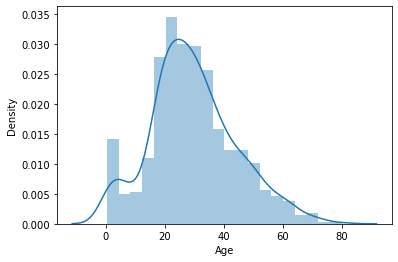

In [5]:
import seaborn as sns 
sns.distplot(dataset['Age'].dropna()) 

In [6]:
# So we replace the null values in age with the mean for normal distribution
dataset['Age'].fillna(dataset['Age'].mean(),inplace=True)

In [7]:
dataset

,Survived,Pclass,Sex,Age,Embarked
0,0,3,male,22.000000,S
1,1,1,female,38.000000,C
2,1,3,female,26.000000,S
3,1,1,female,35.000000,S
4,0,3,male,35.000000,S
...,...,...,...,...,...
886,0,2,male,27.000000,S
887,1,1,female,19.000000,S
888,0,3,female,29.699118,S
889,1,1,male,26.000000,C


In [8]:
dataset['Embarked'].fillna(dataset['Embarked'].mode().iloc[0],inplace=True)

In [9]:
dataset.isnull().any()

Survived    False
Pclass      False
Sex         False
Age         False
Embarked    False
dtype: bool

In [10]:
dataset

,Survived,Pclass,Sex,Age,Embarked
0,0,3,male,22.000000,S
1,1,1,female,38.000000,C
2,1,3,female,26.000000,S
3,1,1,female,35.000000,S
4,0,3,male,35.000000,S
...,...,...,...,...,...
886,0,2,male,27.000000,S
887,1,1,female,19.000000,S
888,0,3,female,29.699118,S
889,1,1,male,26.000000,C


# Separating dependent and independent variables

In [11]:
x=dataset.iloc[:,1:5].values # Independent columns
x

array([[3, 'male', 22.0, 'S'],
       [1, 'female', 38.0, 'C'],
       [3, 'female', 26.0, 'S'],
       ...,
       [3, 'female', 29.69911764705882, 'S'],
       [1, 'male', 26.0, 'C'],
       [3, 'male', 32.0, 'Q']], dtype=object)

In [12]:
y=dataset.iloc[:,0].values # Dependent column
y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

# Encoding the categorical variable

In [13]:
dataset['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [14]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
x[:,1] =le.fit_transform(x[:,1]) # For encoding 'Sex' column into encoded numerics

In [15]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [16]:
ct= ColumnTransformer([("on",OneHotEncoder(drop='first'),[3])],remainder="passthrough") # Index=3 for 'Embarked' column
x=ct.fit_transform(x)
x

array([[0.0, 1.0, 3, 1, 22.0],
       [0.0, 0.0, 1, 0, 38.0],
       [0.0, 1.0, 3, 0, 26.0],
       ...,
       [0.0, 1.0, 3, 0, 29.69911764705882],
       [0.0, 0.0, 1, 1, 26.0],
       [1.0, 0.0, 3, 1, 32.0]], dtype=object)

In [17]:
x.shape

(891, 5)

In [18]:
y.shape

(891,)

# Splitting of train and test data

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0) # 20% test size

In [20]:
x_train

array([[0.0, 0.0, 3, 0, 29.69911764705882],
       [0.0, 1.0, 2, 1, 31.0],
       [0.0, 0.0, 2, 1, 31.0],
       ...,
       [1.0, 0.0, 3, 1, 29.69911764705882],
       [0.0, 1.0, 3, 0, 36.0],
       [0.0, 1.0, 2, 1, 60.0]], dtype=object)

In [21]:
x_test

array([[0.0, 0.0, 3, 1, 29.69911764705882],
       [0.0, 1.0, 3, 1, 29.69911764705882],
       [1.0, 0.0, 3, 1, 7.0],
       [0.0, 0.0, 1, 0, 29.69911764705882],
       [0.0, 0.0, 3, 0, 29.0],
       [0.0, 1.0, 1, 1, 29.69911764705882],
       [0.0, 1.0, 1, 0, 40.0],
       [0.0, 1.0, 1, 0, 31.0],
       [0.0, 0.0, 1, 1, 25.0],
       [0.0, 0.0, 3, 0, 29.69911764705882],
       [0.0, 1.0, 3, 1, 26.0],
       [0.0, 1.0, 2, 0, 40.0],
       [1.0, 0.0, 3, 1, 29.69911764705882],
       [0.0, 1.0, 2, 0, 7.0],
       [0.0, 0.0, 1, 0, 24.0],
       [0.0, 1.0, 3, 0, 14.0],
       [0.0, 1.0, 3, 1, 23.0],
       [0.0, 1.0, 2, 1, 19.0],
       [0.0, 1.0, 3, 1, 35.0],
       [0.0, 0.0, 3, 1, 0.42],
       [0.0, 1.0, 2, 1, 18.0],
       [0.0, 1.0, 1, 0, 22.0],
       [1.0, 0.0, 3, 1, 29.69911764705882],
       [0.0, 1.0, 1, 1, 29.69911764705882],
       [0.0, 1.0, 3, 0, 22.0],
       [0.0, 0.0, 1, 0, 40.0],
       [0.0, 1.0, 3, 1, 32.0],
       [0.0, 1.0, 3, 0, 22.0],
       [0.0, 1.0, 2, 0, 25.0],

In [22]:
y_train

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,

In [23]:
y_test

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0], dtype=int64)